In [2]:
import pandas as pd
from looper import Looper
from PIL import Image
import numpy as np

from models import CNN_Encoder, RNN_Decoder, image_features_extract_model

In [3]:
looper = Looper(CNN_Encoder, RNN_Decoder, image_features_extract_model)

Training with the following params:
VOCAB_SIZE : 5000
BATCH_SIZE : 32
BUFFER_SIZE : 5000
embedding_dim : 512
embedding_words : 300
units : 512
embedding_size : 5001
MAX_LENGTH : 20
TOKENIZER_FOLDER : ./tokenizer/
TOKENIZER_NAME : spbe_tokenizer.e
CHECKPOINT_FOLDER : saved_models
## Run set_params to change params ##


In [4]:
tokenizer = looper.load_tokenizer()

loading from ./tokenizer/spbe_tokenizer.e


In [5]:
looper.params

{'VOCAB_SIZE': 5000,
 'BATCH_SIZE': 32,
 'BUFFER_SIZE': 5000,
 'embedding_dim': 512,
 'embedding_words': 300,
 'units': 512,
 'embedding_size': 5001,
 'MAX_LENGTH': 20,
 'TOKENIZER_FOLDER': './tokenizer/',
 'TOKENIZER_NAME': 'spbe_tokenizer.e',
 'CHECKPOINT_FOLDER': 'saved_models'}

In [6]:
# CHANGE PARAMS

params = {'VOCAB_SIZE': 5000,
 'BATCH_SIZE': 32,
 'BUFFER_SIZE': 5000,
 'embedding_dim': 1024,
 'embedding_words': 300,
 'units': 768,
 'embedding_size': 5001,
 'MAX_LENGTH': 20,
 'TOKENIZER_FOLDER': './tokenizer/',
 'TOKENIZER_NAME': 'spbe_tokenizer.e',
 'CHECKPOINT_FOLDER': './checkpoint_dis/1024_embed_758_units_new_aug'}

params = looper.set_params(params)

Training with the following params:
VOCAB_SIZE : 5000
BATCH_SIZE : 32
BUFFER_SIZE : 5000
embedding_dim : 1024
embedding_words : 300
units : 768
embedding_size : 5001
MAX_LENGTH : 20
TOKENIZER_FOLDER : ./tokenizer/
TOKENIZER_NAME : spbe_tokenizer.e
CHECKPOINT_FOLDER : ./checkpoint_dis/1024_embed_758_units_new_aug
## Run set_params to change params ##


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f7c6d7518>]],
      dtype=object)

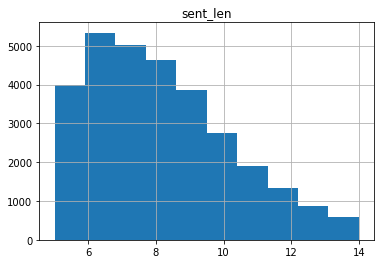

In [7]:
data = pd.read_csv('val.csv')
captions_val = data.title.to_list()
images_val = data.paths.to_list()

data = pd.read_csv('train.csv')
data['captions'] =  data['captions'].astype(str)
data['sent_len'] = data['captions'].apply(lambda r: len(r.split(' ')))
data = data[(data['sent_len']<20) & (data['sent_len']>4)]
captions_train = data.title.to_list()
images_train = data.paths.to_list()
data.hist('sent_len')

In [8]:
dataset_val = looper.make_dataset(images_val,captions_val)

max title len 20
len titles: 2375,len images: 2375
captions vector shape (2375, 20)
NOT using augmentations in loader


In [9]:
dataset_train = looper.make_dataset(images_train, captions_train, loader_type='aug')

max title len 20
len titles: 29254,len images: 29254
captions vector shape (29254, 20)
Using augmentations in loader


In [10]:
plot = looper.train(dataset_train, dataset_val, 32, save_n=3)

Epoch 1 Batch 0 Loss 3.1576
Epoch 1 Batch 100 Loss 1.6862
Epoch 1 Batch 200 Loss 1.5668
Epoch 1 Batch 300 Loss 1.4823
Epoch 1 Batch 400 Loss 1.4541
Epoch 1 Batch 500 Loss 1.5436
Epoch 1 Batch 600 Loss 1.4278
Epoch 1 Batch 700 Loss 1.4306
Epoch 1 Batch 800 Loss 1.3887
Epoch 1 Batch 900 Loss 1.5105
precision at | val: 0.18148810068766277, train: 0.18567850081647028
Epoch 1 Loss 1.547098
Time taken for 1 epoch 375.66680908203125 sec

Epoch 2 Batch 0 Loss 1.4873
Epoch 2 Batch 100 Loss 1.5712
Epoch 2 Batch 200 Loss 1.3931
Epoch 2 Batch 300 Loss 1.5044
Epoch 2 Batch 400 Loss 1.5764
Epoch 2 Batch 500 Loss 1.2811
Epoch 2 Batch 600 Loss 1.3435
Epoch 2 Batch 700 Loss 1.1512
Epoch 2 Batch 800 Loss 1.2879
Epoch 2 Batch 900 Loss 1.4095
Epoch 2 Loss 1.370026
Time taken for 1 epoch 211.29568314552307 sec

Epoch 3 Batch 0 Loss 1.3141
Epoch 3 Batch 100 Loss 1.3250
Epoch 3 Batch 200 Loss 1.2426
Epoch 3 Batch 300 Loss 1.1034
Epoch 3 Batch 400 Loss 1.3769
Epoch 3 Batch 500 Loss 1.1397
Epoch 3 Batch 600 Lo

In [12]:
# import matplotlib.pyplot as plt
# epoch = [t['epoch'] for t in plot]
# val_s = [t['vsl'] for t in plot]

# CHECK VAL

Real Caption: how to ask why the suicidal teenager is bald
0.5, how to ignore your depressed , score 2
0.7, how to ignore your depressed , score 2
0.9, how to use disneyvacation forward to your junk of a snake , score 2
1, how to decide the difference between a computer virus , score 3


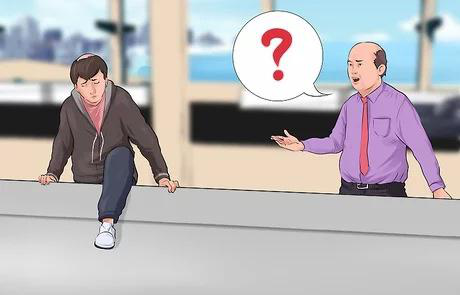

In [65]:
#### captions on the validation set

#img_name_val, cap_val
rid = np.random.randint(0, len(captions_val))
image = images_val[rid] #'./img.jpg' #
real_caption = captions_val[rid]
print ('Real Caption:', real_caption)

at_k = 5 # use 5 first words to compute score
seed = None #'▁cat'

for t in [0.5,0.7,0.9,1]:
    predicted_ids, a = looper.predict_one(image, t, argmax =2, seed=seed)
    real_cap = set(real_caption.split(' '))
    predicted_cap =  looper.tokenizer.decode(predicted_ids)
    score = len(real_cap.intersection(set(predicted_cap.split(' ')[:at_k]))) #/len(word)
    print(f"{t}, {predicted_cap}, score {score}")
Image.open(image)

0.5, how to lose your relationship with the wankmemes , score 2
0.7, how to lose your relationship with the wiences , score 2
0.9, how to lose your relationship with the wiences , score 2
1, how to get your relationship with a wienature , score 2


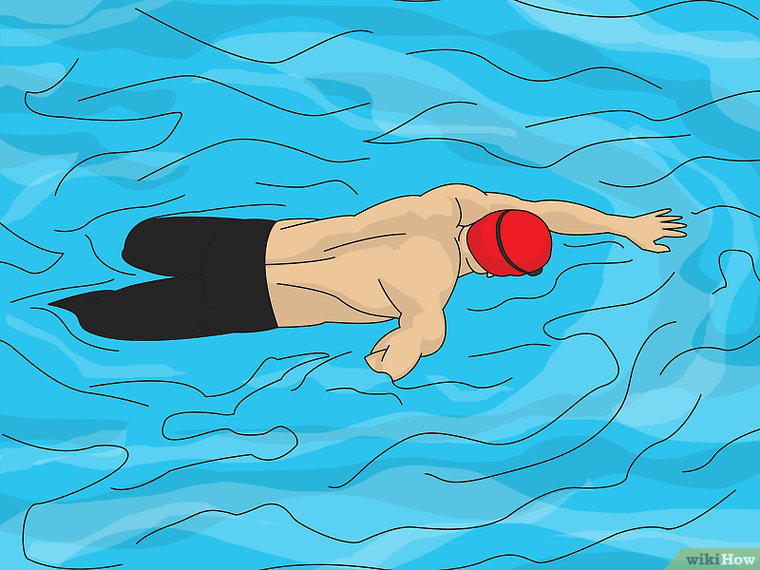

In [73]:
#### captions on the validation set

#img_name_val, cap_val
#rid = np.random.randint(0, len(captions_val))
image =  './img.jpg' #images_val[rid]
#real_caption = captions_val[rid]
#print ('Real Caption:', real_caption)

at_k = 5 # use 5 first words to compute score
seed =  None #  '▁computer' 

for t in [0.5,0.7,0.9,1]:
    predicted_ids, a = looper.predict_one(image, t, argmax =2, seed=seed)
    real_cap = set(real_caption.split(' '))
    predicted_cap =  looper.tokenizer.decode(predicted_ids)
    score = len(real_cap.intersection(set(predicted_cap.split(' ')[:at_k]))) #/len(word)
    print(f"{t}, {predicted_cap}, score {score}")
Image.open(image)

### CHECK TRAIN

Real Caption: how to find your way back home
0.5, how to enter the mile highero , score 2
0.7, how to activate your body , score 3
0.9, how to become a person in your neighborhood , score 2
1, how to wake easily for the extrem out of the pads of art career or not for all, score 2


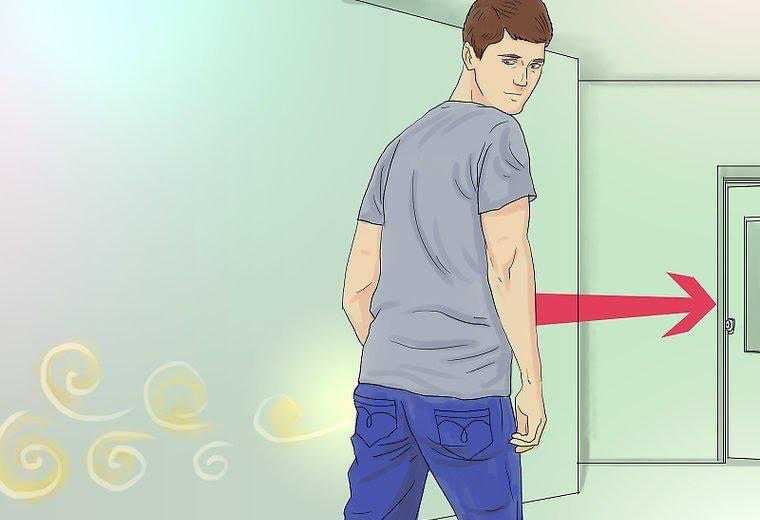

In [133]:
#### captions on the validation set

#img_name_val, cap_val
rid = np.random.randint(0, len(captions_train))
image = images_train[rid] #'./img.jpg' #
real_caption = captions_train[rid]
print ('Real Caption:', real_caption)

at_k = 5 # use 5 first words to compute score
seed = None #'▁cat'

for t in [0.5,0.7,0.9,1]:
    predicted_ids, a = looper.predict_one(image, t, argmax =2, seed=seed)
    real_cap = set(real_caption.split(' '))
    predicted_cap =  looper.tokenizer.decode(predicted_ids)
    score = len(real_cap.intersection(set(predicted_cap.split(' ')[:at_k]))) #/len(word)
    print(f"{t}, {predicted_cap}, score {score}")
Image.open(image)